In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.cm as cm

from sympy import symbols, diff
import math

**Some things you should know:**

Embed math with LaTeX: inline

dollarSign($) … dollarSign, display dollarSign … dollarSign

%matplotlib inline embeds figures in exports

## We define a simple cost function

### $$ f(x) = x^2 + x + 1 $$

In [2]:
def f(x):
    return x**2 + x + 1

### Generating sample data

In [3]:
x1= np.linspace(start= -5,stop= 5,num= 100)

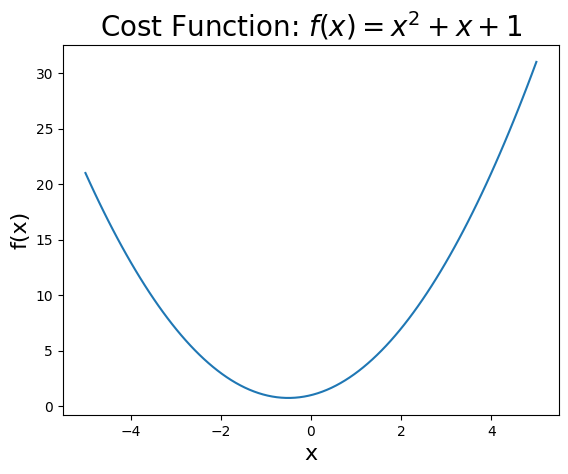

In [4]:
# Plotting the function
plt.plot(x1, f(x1))
plt.title('Cost Function: $f(x) = x^2 + x + 1$', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.style.use('fivethirtyeight')
plt.show()

Goal: Find the value of x that minimizes the cost function 
$$f(x) = x^2 + x + 1$$

Key insight:

At the minimum, the slope of the function is zero

Slope is given by the derivative of the function

In [5]:
def df(x):
    return 2*x + 1

### Plotting function and derivative side-by-side

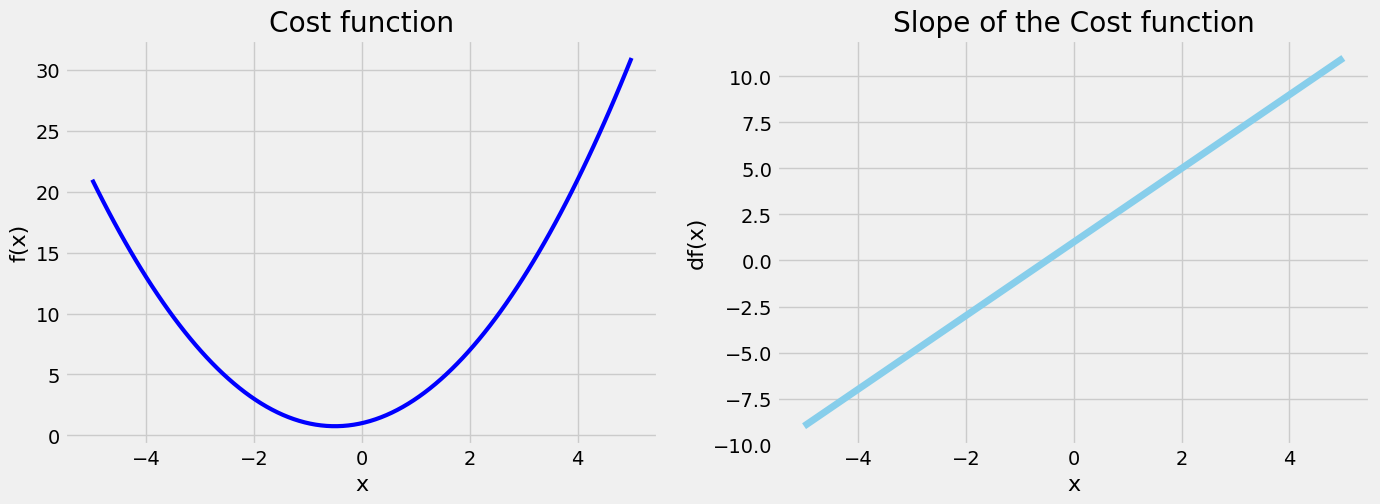

In [6]:
plt.figure(figsize=[15, 5])  # set width, height in inches

# First plot: cost function
plt.subplot(1, 2, 1)
plt.plot(x1, f(x1), color='blue', linewidth=3)
plt.title('Cost function')
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)


# Second plot: derivative
plt.subplot(1, 2, 2)
plt.grid(True)
plt.plot(x1, df(x1), color='skyblue', linewidth=5)
plt.title('Slope of the Cost function')
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.show()

To stack plots vertically instead of side by side:

Change subplot to subplot(2, 1, 1) and subplot(2, 1, 2)

Adjust figure size to something like [5, 15] for better appearance

## Gradient Descent Algorithm

In [7]:
new_x = 2
previous_x = 0
step_multiplier = 0.1
precision = 0.000001

x_list = [new_x]
slope_list = [df(new_x)]

for i in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    # print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times:', i)
        break
    
print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 59
Local minimum occurs at: -0.49999616876114783
Slope or df(x) value at this point is: 7.66247770433992e-06
f(x) value or cost at this point is: 0.7500000000146784


In [8]:
#

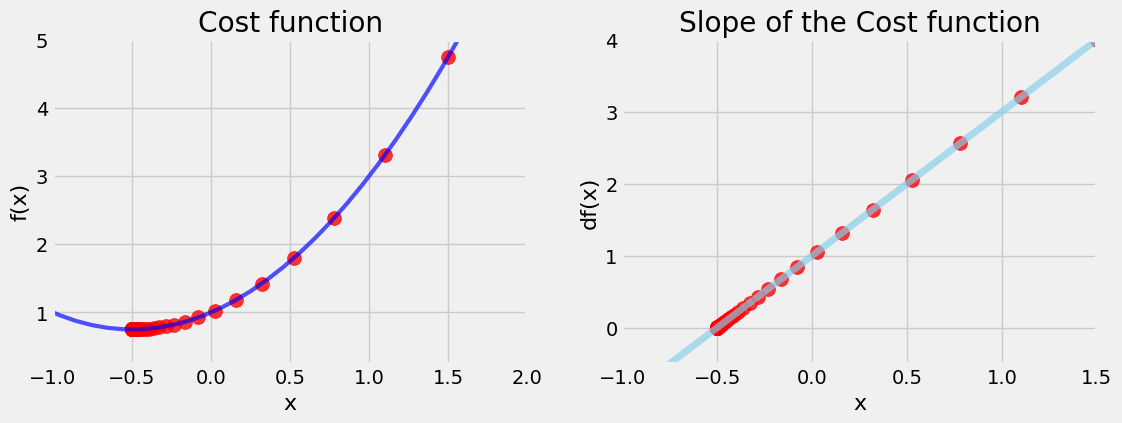

In [9]:
plt.figure(figsize=[12, 4])  # set width, height in inches

# First plot: cost function
plt.subplot(1, 2, 1)
plt.plot(x1, f(x1), color='blue', linewidth=3, alpha=0.67)
plt.scatter(x_list, f(np.array(x_list)), color='red', s=100, alpha=0.8)
plt.title('Cost function')
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.xlim(-1, 2)
plt.ylim(0.25, 5)


# Second plot: derivative
plt.subplot(1, 2, 2)
plt.grid(True)
plt.plot(x1, df(x1), color='skyblue', linewidth=5, alpha=0.67)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.8)
plt.title('Slope of the Cost function')
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.xlim(-1, 1.5)
plt.ylim(-0.5, 4)

plt.show()

## Example 2: Multiple Minima & Initial Guess
## $$g(x) = x^4 - 4x^2 + 5$$

In [10]:
# generating data
x2= np.linspace(start=-2, stop=2, num=500)

In [11]:
# defining the function & its derivative
def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

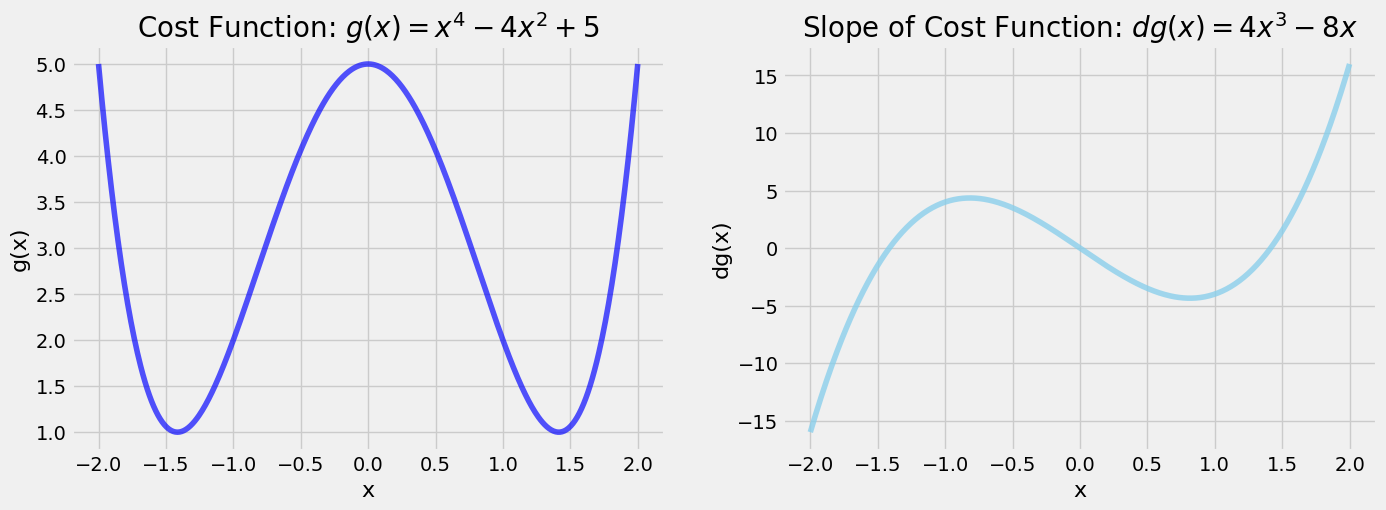

In [12]:
plt.figure(figsize=[15, 5])  # set width, height in inches
plt.subplot(1, 2, 1)
plt.plot(x2, g(x2), color='blue', linewidth=4, alpha=0.67)
plt.title('Cost Function: $g(x) = x^4 - 4x^2 + 5$', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.subplot(1, 2, 2)
plt.plot(x2, dg(x2), color='skyblue', linewidth=4, alpha=0.77)
plt.title('Slope of Cost Function: $dg(x) = 4x^3 - 8x$', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.show()

Observation: Two minima (≈ ±1.4), one maximum at x = 0; zeros of dg(x) correspond exactly.

# Restructuring Gradient Descent code into a Function

In [13]:
def gradient_descent(slope_func, initial_guess, step_multiplier= 0.01,
                     precision= 0.00001, max_iterations= 500):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [slope_func(new_x)]

    for i in range(max_iterations):
        previous_x = new_x
        gradient = slope_func(previous_x)
        new_x = previous_x - step_multiplier * gradient
    
        step_size = abs(new_x - previous_x)
        # print(step_size)
        
        x_list.append(new_x)
        slope_list.append(slope_func(new_x))
        
        if step_size < precision:
            break  

    return new_x, x_list, slope_list


In [14]:
# calling the function
result, x_list, slope_list= gradient_descent(dg, 0.5)
print('Local minimum occurs at:', result)
print('Slope or dg(x) value at this point is:', dg(result))
print('g(x) value or cost at this point is:', g(result))
print("Number of iterations:", len(x_list)-1)

Local minimum occurs at: 1.4141668991848309
Slope or dg(x) value at this point is: -0.0007465740600292037
g(x) value or cost at this point is: 1.0000000174190506
Number of iterations: 68


### Visualizing gradient‐descent paths on g(x)

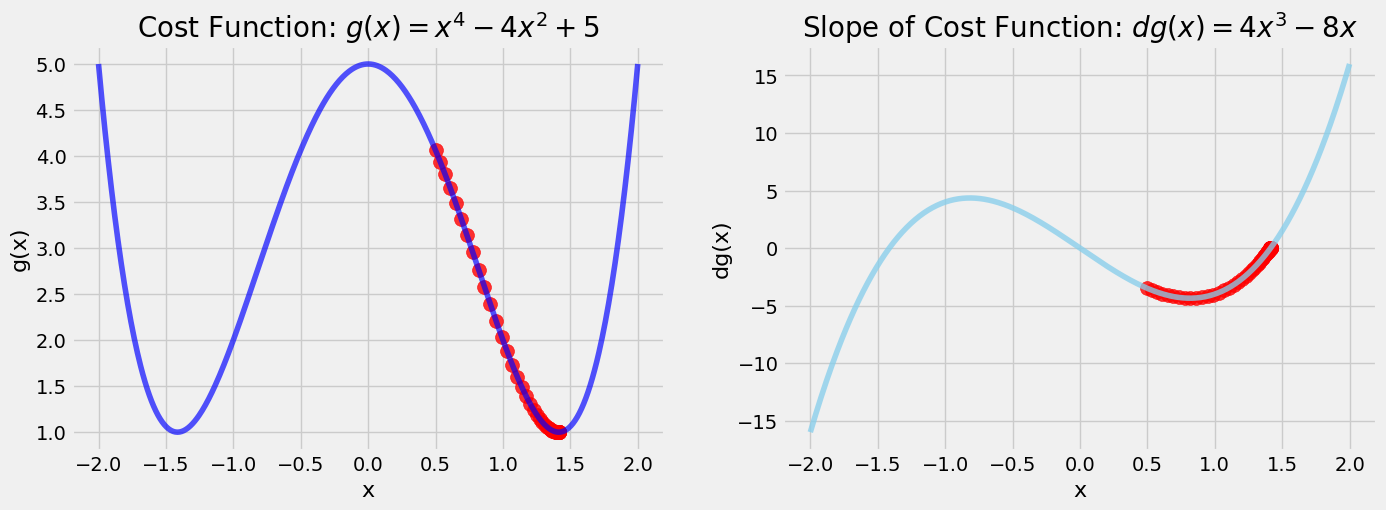

In [15]:
plt.figure(figsize=[15, 5])  # set width, height in inches
plt.subplot(1, 2, 1)

plt.plot(x2, g(x2), color='blue', linewidth=4, alpha=0.67)
plt.scatter(x_list, g(np.array(x_list)), color='red', s=100, alpha=0.8)
plt.title('Cost Function: $g(x) = x^4 - 4x^2 + 5$', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.subplot(1, 2, 2)

plt.plot(x2, dg(x2), color='skyblue', linewidth=4, alpha=0.77)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.8)
plt.title('Slope of Cost Function: $dg(x) = 4x^3 - 8x$', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.show()

In [16]:
# calling the function
result, x_list, slope_list= gradient_descent(dg, 0)
print('Local minimum occurs at:', result)
print('Slope or dg(x) value at this point is:', dg(result))
print('g(x) value or cost at this point is:', g(result))
print("Number of iterations:", len(x_list)-1)

Local minimum occurs at: 0.0
Slope or dg(x) value at this point is: 0.0
g(x) value or cost at this point is: 5.0
Number of iterations: 1


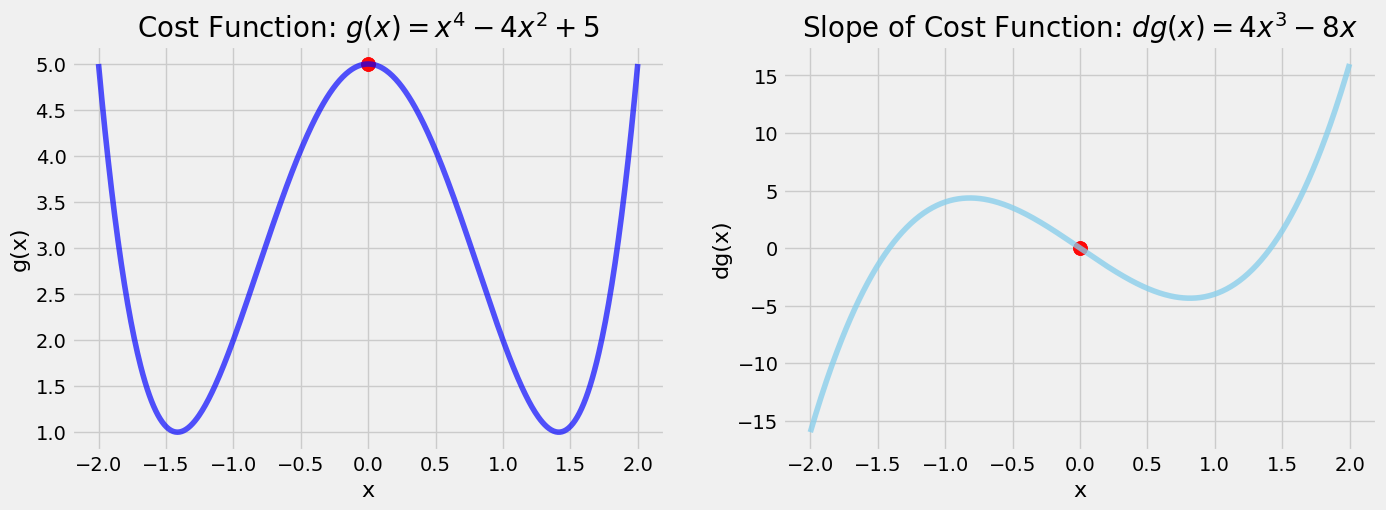

In [17]:
plt.figure(figsize=[15, 5])  # set width, height in inches

plt.subplot(1, 2, 1)

plt.plot(x2, g(x2), color='blue', linewidth=4, alpha=0.67)
plt.scatter(x_list, g(np.array(x_list)), color='red', s=100, alpha=0.8)
plt.title('Cost Function: $g(x) = x^4 - 4x^2 + 5$', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.subplot(1, 2, 2)

plt.plot(x2, dg(x2), color='skyblue', linewidth=4, alpha=0.77)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.8)
plt.title('Slope of Cost Function: $dg(x) = 4x^3 - 8x$', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.show()

**Sensitivity to start**

Start = 0.1 → minimum at +1.4

Start = 2 → same +1.4

Start = –1.8 or –0.1 → minimum at –1.4

## Start = 0 → stuck at local maximum x = 0 (dg(0)=0)

- Discussion

Local vs. global minima in non-convex landscapes

Remedies: multiple random restarts; alternative algorithms (e.g., stochastic GD)



**Key Terms / Questions**

Cost Function / Loss Function: 
$$ g(x)= x^4 - 4x^2 + 5 $$

measures how well a model fits the data → used to evaluate model performance

Derivative / Gradient: 
gives slope → used for update direction

Subplots (plt.subplot) & Figure sizing (plt.figure(figsize=…))

Passing Functions as arguments in Python

Default Arguments vs. Required Parameters

Multiple Return Values from a function

Gradient Descent Sensitivity: dependence on initial guess; local vs. global minima

Mitigations: random restarts, stochastic gradient descent, other optimization methods

**Summary**

In this lesson we extended gradient descent to a more complex cost function
$$g(x)=x^4−4x^2+5$$

that has two minima and one maximum. We refactored our algorithm into a versatile Python function—accepting another function as input, providing default parameters, and returning multiple outputs. Visualizing different starting points revealed the method’s sensitivity: depending on the initial guess, gradient descent can converge to either local minimum or get stuck at a local maximum. Finally, we discussed strategies such as multiple random restarts and alternative algorithms (e.g., stochastic gradient descent) to overcome these limitations.

# Example 3: Divergence & Overflow
## $$h(x)= x^5 - 2x^4 + 2$$

In [18]:
# generating data
x3= np.linspace(start=-3, stop=3, num=1000)

# defining the function & its derivative
def h(x):
    return x**5 - 2*x**4 + 2
def dh(x):
    return 5*x**4 - 8*x**3

In [19]:
# calling the function
result, x_list, slope_list= gradient_descent(dh, 0.4)
print('Local minimum occurs at:', result)
print('Slope or dg(x) value at this point is:', dh(result))
print('g(x) value or cost at this point is:', h(result))
print("Number of iterations:", len(x_list)-1)

Local minimum occurs at: 1.5999669340201357
Slope or dg(x) value at this point is: -0.0006771492834971582
g(x) value or cost at this point is: -0.6214399888044664
Number of iterations: 106


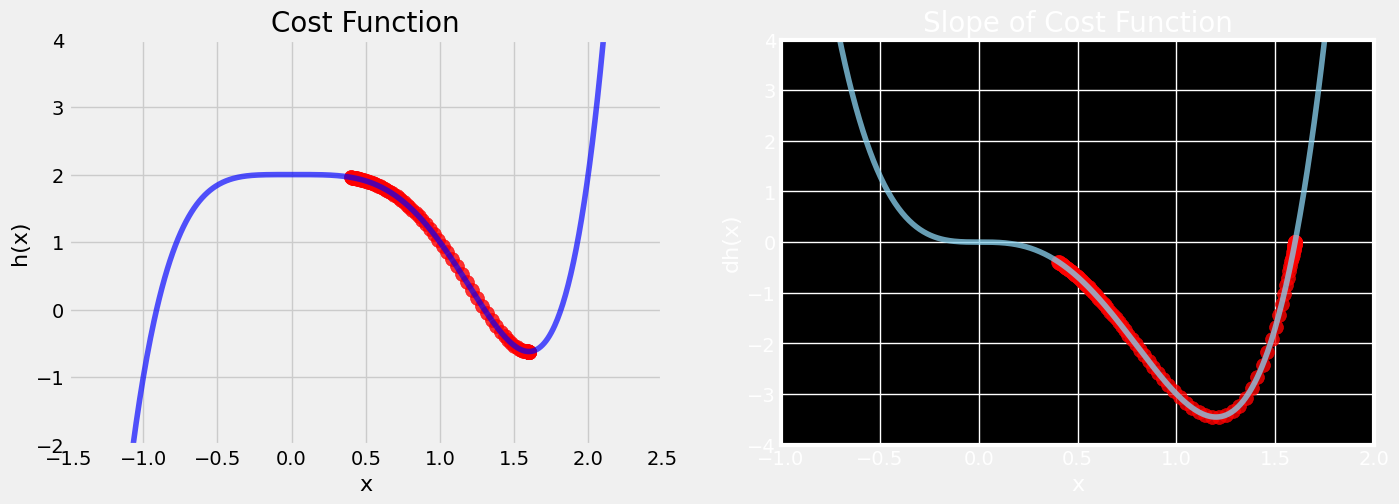

In [20]:
plt.figure(figsize=[15, 5])  # set width, height in inches
plt.subplot(1, 2, 1)
plt.style.use('dark_background')

plt.plot(x3, h(x3), color='blue', linewidth=4, alpha=0.67)
plt.scatter(x_list, h(np.array(x_list)), color='red', s=100, alpha=0.8)
plt.title('Cost Function', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.xlim(-1.5, 2.5)
plt.ylim(-2, 4)

plt.subplot(1, 2, 2)

plt.plot(x3, dh(x3), color='skyblue', linewidth=4, alpha=0.77)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.8)
plt.title('Slope of Cost Function', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.xlim(-1, 2)
plt.ylim(-4, 4)

plt.show()

- Gradient descent behavior

Starting guess = +0.2 → converges to a local minimum at ≈ 1.6 in ~117 steps

Starting guess = –0.2 → OverflowError (“float overflow”)

Why? Descends down the unbounded left side → step sizes grow exponentially → values exceed Python’s max float (~1.8 × 10³⁰⁸) → crash.

- Controlling iterations

Add max_iter parameter with default (e.g. 300) → use for _ in range(max_iter)

Experiment with smaller max_iter to watch the descent before overflow

In [21]:
# calling the function
result, x_list, slope_list= gradient_descent(slope_func= dh,initial_guess= -0.2,
                                             max_iterations= 133)
print('Local minimum occurs at:', result)
print('Slope or dg(x) value at this point is:', dh(result))
print('g(x) value or cost at this point is:', h(result))
print("Number of iterations:", len(x_list)-1)

Local minimum occurs at: -18.03916285322386
Slope or dg(x) value at this point is: 576424.0780800029
g(x) value or cost at this point is: -2121996.5941754677
Number of iterations: 133


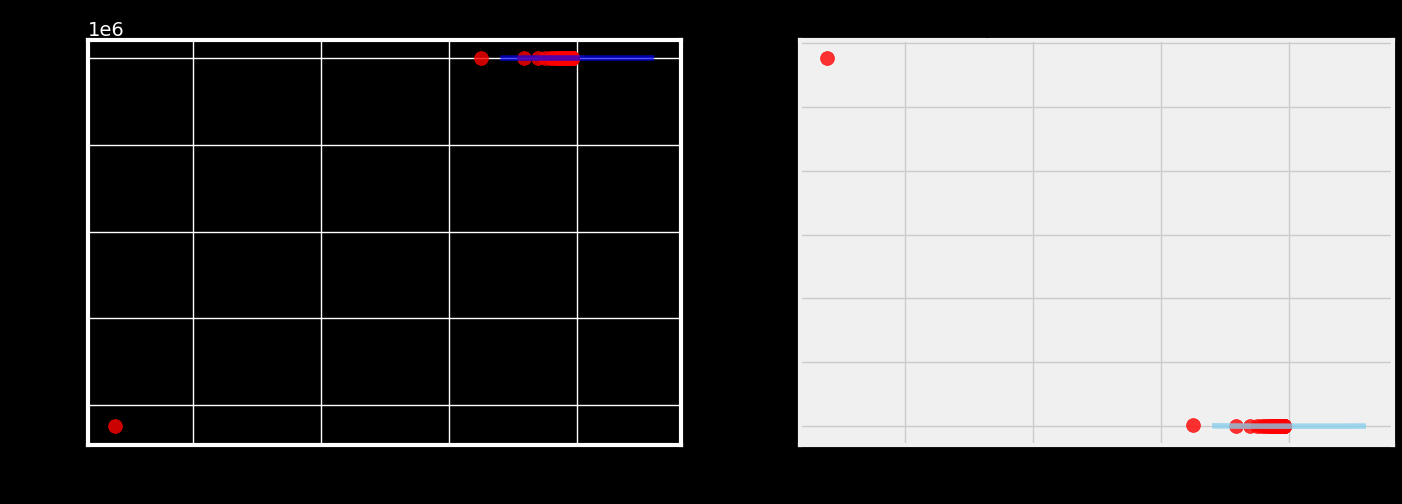

In [22]:
plt.figure(figsize=[15, 5])  # set width, height in inches
plt.subplot(1, 2, 1)
plt.style.use('fivethirtyeight')

plt.plot(x3, h(x3), color='blue', linewidth=4, alpha=0.67)
plt.scatter(x_list, h(np.array(x_list)), color='red', s=100, alpha=0.8)
plt.title('Cost Function', fontsize=20, c='black')
plt.xlabel('x', fontsize=16, c='black')
plt.ylabel('h(x)', fontsize=16, c='black')
plt.xticks(fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')

plt.subplot(1, 2, 2)

plt.plot(x3, dh(x3), color='skyblue', linewidth=4, alpha=0.77)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.8)
plt.title('Slope of Cost Function', fontsize=20, c='black')
plt.xlabel('x', fontsize=16, c='black')
plt.ylabel('dh(x)', fontsize=16, c='black')
plt.xticks(fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')

plt.show()

## Inspecting Python’s float limits

In [23]:
import sys
sys.float_info.max   # ~1.79e308

1.7976931348623157e+308

**Key Terms / Questions**

Divergence: gradient descent steps grow instead of shrink

OverflowError (Exception): numeric result exceeds Python’s float limits

sys.float_info.max: machine-specific maximum float

max_iter parameter: caps number of iterations to avoid infinite/diverging loops

- **Summary**

In this lesson we explored a third cost function 
$$ℎ(𝑥)=𝑥^5−2𝑥^4+2$$
that diverges for certain starting points. Starting at +0.2 converged to a local minimum, but at –0.2 the gradient steps blew past Python’s maximum float (~1.8 × 10³⁰⁸), triggering an overflow error. We modified the descent routine to accept a max_iter limit, inspected Python’s float range via sys.float_info.max, and demonstrated how to cap iterations to observe partial progress without crashing. Finally, we dug into Python tuples—packing return values into a tuple, immutability, single-element syntax, and unpacking—to clarify how our descent function returns and callers unpack its multiple outputs.

# The Learning Rate

- Role of the learning rate (multiplier) :

In gradient descent:
multiplier scales the step size alongside the gradient.
Large multiplier → larger jumps; small multiplier → smaller, slower steps

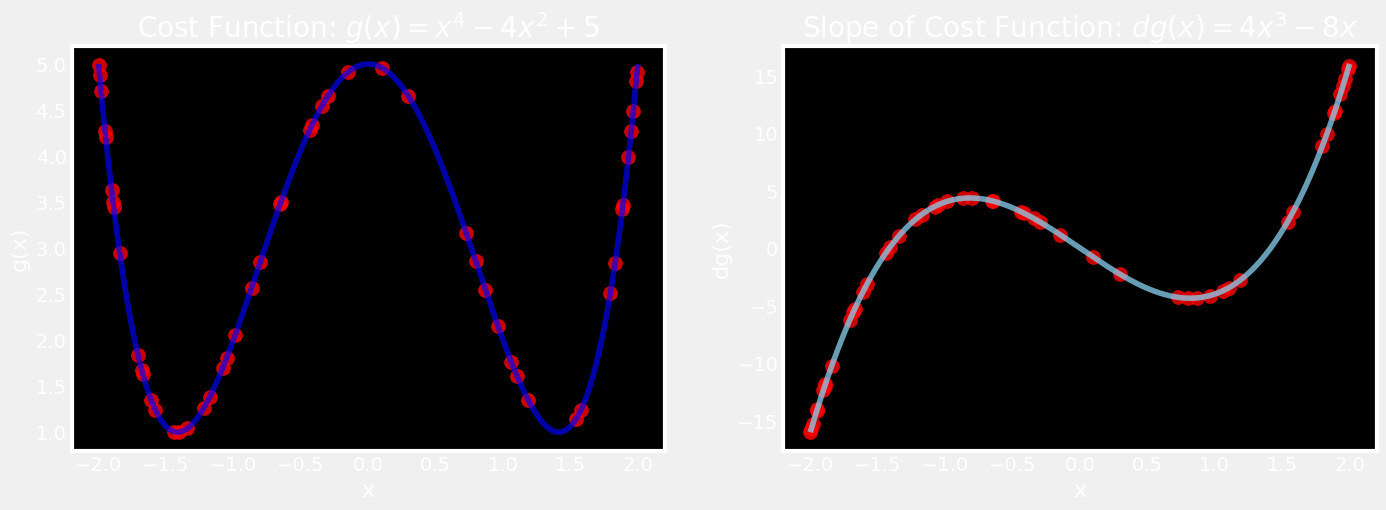

Number of iterations: 50


In [24]:
result, x_list, slope_list= gradient_descent(slope_func= dg, initial_guess= 0.1,
                                             step_multiplier= 0.25, max_iterations= 50)

plt.figure(figsize=[15, 5])  # set width, height in inches
plt.style.use('dark_background')
plt.subplot(1, 2, 1)

plt.plot(x2, g(x2), color='blue', linewidth=4, alpha=0.67)
plt.scatter(x_list, g(np.array(x_list)), color='red', s=100, alpha=0.8)
plt.title('Cost Function: $g(x) = x^4 - 4x^2 + 5$', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.grid(False)

plt.subplot(1, 2, 2)

plt.plot(x2, dg(x2), color='skyblue', linewidth=4, alpha=0.77)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.8)
plt.title('Slope of Cost Function: $dg(x) = 4x^3 - 8x$', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid(False)

plt.show()

print("Number of iterations:", len(x_list)-1)

- Experimenting with learning rate

On 
$$𝑔(𝑥)=𝑥^4−4𝑥^2+5$$
start at 𝑥 = 1.9, precision=0.001

Default multiplier=0.02, max_iter=∞ (or large) → converges in ~14 steps

Small
𝛼 (e.g. 0.005) → very slow convergence

Moderate 
𝛼 (e.g. 0.25) → oscillations (“bounces”) around minimum

Too large 
𝛼 (e.g. ≥0.3) → divergence → overflow errors

- Visualization of cost vs. iterations

Plot cost 
𝑔(𝑥) against iteration count for multiple 𝛼 on same axes

Compare “low,” “mid,” “high,” and “insane” learning rates

Shows:

Higher 
𝛼 → faster initial drop, but only up to a threshold

Excessive 
𝛼 → no convergence, cost oscillates or overflows

- For loop vs. while loop

For loop requires explicit max_iter → safe guard against infinite loops

While loop (e.g. while step_size > precision:) risks non-terminating loops when cost diverges

- Adaptive learning-rate strategies (preview)

Learning-rate schedules: decrease 𝛼 over time

Bold Driver heuristic:

If cost decreases → 𝛼 → α×1.05

If cost increases → revert last step & 
𝛼 → 𝛼×0.5

**Key Terms / Questions**

Learning rate (𝛼 / multiplier)

Convergence vs. divergence in gradient descent

OverflowError: numeric result exceeds Python’s float max

For loops vs. while loops: forced iteration cap vs. potential infinite loops

Cost vs. iterations plot: tool for tuning 𝛼

Adaptive learning-rate methods (schedules, Bold Driver)


**Summary**

The learning rate (𝛼) critically controls gradient-descent step sizes: small 𝛼 yields slow but stable convergence; large 𝛼 can speed up progress but risk oscillation or outright divergence (overflow errors). Visualizing cost vs. iteration for several 𝛼 on the same plot quickly reveals effective vs. problematic rates. Using a for loop with a max_iter guard prevents infinite loops, unlike a naive while loop. In practice, one can employ adaptive schemes—like decaying schedules or the “Bold Driver” rule—to adjust 𝛼 dynamically, balancing convergence speed and stability.

# Example 4: Multiple Parameters

## Defining a 2-variable cost function
### $$ f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1} $$

In [25]:
def f(x, y):
    r= 3**(-x**2 - y**2)
    return 1/(r + 1)

In [26]:
# Generating a 2D grid of inputs

x4 = np.linspace(-2, 2, 200)
y4 = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x4, y4)    # → X, Y now 200×200 arrays
Z = f(X, Y)                   # element-wise apply f to grid

# A MISTAKE

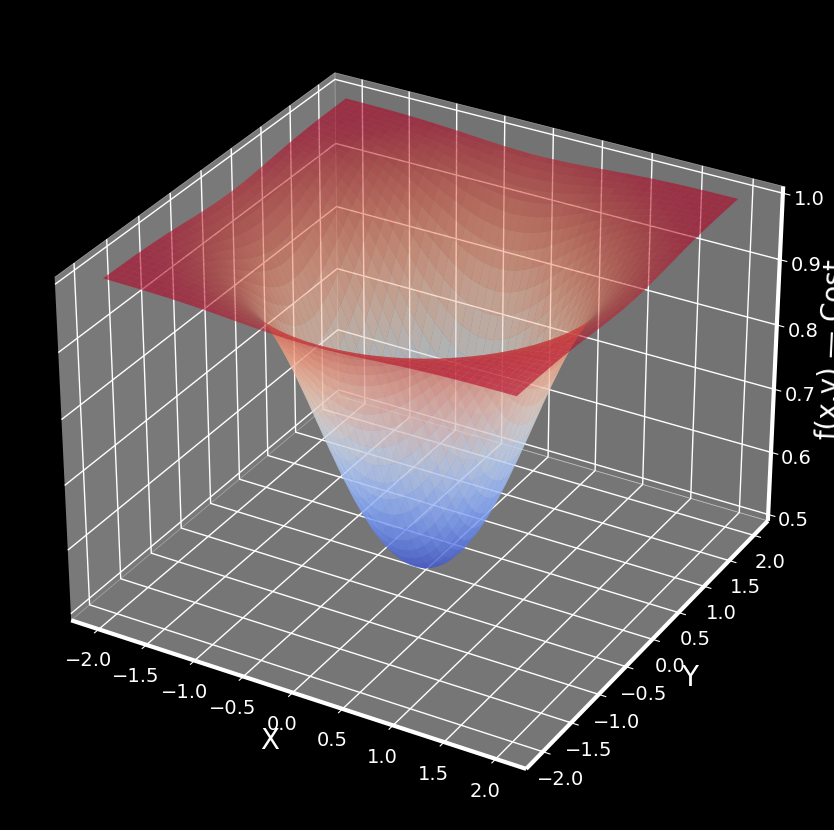

In [52]:
# Setting up a 3D figure & axes

fig = plt.figure(figsize=(16, 10))
ax  = fig.add_subplot(111, projection='3d')    # “get current axes” in 3D

# Plotting the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.6)    #cm= colormap

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) — Cost', fontsize=20)

plt.show()

**Key Terms / Questions**

LaTeX in Markdown: \$…\$ (inline) vs. \$$…\$$ (display)

np.meshgrid: builds 2D arrays from 1D coordinate vectors

Figure vs. Axes: top-level container (fig) vs. plotting region (ax)

3D plotting: Axes3D, plot_surface

Colormap (cmap) and alpha (transparency)



**Summary**

By combining NumPy’s linspace and meshgrid to produce 2D input arrays, with Matplotlib’s 3D API (mpl_toolkits.mplot3d.Axes3D), you can visualize functions of two variables as surfaces in three dimensions. The process involves: creating a figure, retrieving its 3D axes, plotting via ax.plot_surface(X, Y, Z), and then enhancing readability with colormaps (cmap=cm.coolwarm) and labels. Different cmap choices (e.g. plasma, hot, winter) let you highlight high- and low-cost regions through color, while alpha adds depth by making the plane translucent.

## Why partial derivatives?

A 2-variable cost surface 
𝑓(x,𝑦) has a “slope” in each direction (x and y).

You need 
∂𝑓/∂𝑥 and ∂f/∂y to guide gradient descent in 2D.

In [29]:
# Using SymPy for symbolic math

a, b = symbols('x, y')      # treat a≡x, b≡y symbolically
def f(u, v):               # define f(u,v) ≡ 1/(3^{−u²−v²} + 1)
    r = 3**(-u**2 - v**2)
    return 1/(r + 1)

In [30]:
# Computing partial derivatives

# ∂f/∂x  (holding y constant):
fx = diff(f(a, b), a)
# ∂f/∂y  (holding x constant):
fy = diff(f(a, b), b)


In [31]:
# Evaluating the partial derivatives at a point

# Substitute a=1.8, b=1.0 → numeric f:
value = f(a, b).evalf(subs={a:1.8, b:1.0})
# Numeric partial ∂f/∂x at (1.8,1.0):
slope_x = fx.evalf(subs={a:1.8, b:1.0})


In [32]:
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b), b))
print('Value of f(x,y) at x=1.8 y=1.0 is: ', 
      f(a, b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
print('Value of partial derivative wrt x: ',
      diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is:  0.990604794032582
Value of partial derivative wrt x:  0.0368089716197505


**Key Terms / Questions**

Partial derivative: 
∂f/∂x  vs. ∂f∂y
​

Symbolic computation: manipulating expressions algebraically (SymPy)

SymPy: Python library for symbolic math (symbols, diff, evalf)

symbols('x, y'): declares symbolic variables x and y

diff(expr, var): takes derivative of expr with respect to var

evalf(subs={…}): numerically evaluates a symbolic expression with given substitutions

Python dict: {key: value} pairs for subs=

**Summary**

To handle 2-D gradient descent, you must compute ∂f/∂x and ∂f/∂y. SymPy makes this effortless: declare your symbols, define f(a,b) symbolically, use diff to get the partials, then call evalf(subs={…}) with a Python dictionary to plug in any (x,y) point and obtain numeric slopes or cost values—all directly within your Jupyter notebook.

## Batch Gradient Descent using SymPy

In [33]:
multiplier= 0.09
max_iter= 500
x0, y0= 1.8, 1.0

params= np.array([x0, y0]) # supports vectorized updates

for i in range(max_iter):
    grad_x= diff(f(a, b), a).evalf(subs={a: params[0], b: params[1]})
    grad_y= diff(f(a, b), b).evalf(subs={a: params[0], b: params[1]})
    gradients= np.array([grad_x, grad_y])

    params = params - multiplier * gradients

print('Local minimum occurs at x value of:', params[0],
      '\n', 'and y value of: ', params[1])
print('f(x,y) value or cost at this point is:', f(params[0], params[1]))


Local minimum occurs at x value of: 6.14968753709035e-10 
 and y value of:  3.41649307616131e-10
f(x,y) value or cost at this point is: 0.500000000000000


- Observed outcome (from the run)

With reasonable multiplier and enough iterations, gradient descent converged to near x≈0,y≈0.

Final cost converged to ≈0.5 (as expected for the chosen function).

- Why this approach is nice

Symbolic derivatives remove algebraic mistakes and let you obtain exact partials for complicated f(x,y).

NumPy arrays let you update multiple parameters at once, making extension to higher dimensions trivial.

Separation of concerns: use SymPy for math, NumPy for numeric updates/efficiency, matplotlib for plotting if desired.

**KEY TERMS / Questions**

- Params array

- Partial derivative

- evalf(subs={...})

- Vectorized update

Why do we pack gradient_x and gradient_y into a NumPy array before updating?

What could go wrong if gradients contains symbolic objects instead of floats?

How would you extend this code to 3 or more parameters?

How would you implement a convergence check (stop early) instead of always running max_iter?

**Summary**

We implemented batch gradient descent in two dimensions by combining SymPy for exact symbolic partials and NumPy for numeric, vectorized parameter updates. The algorithm evaluates ∂f/∂x and ∂f/∂y at the current (x,y), bundles them into a gradients array, and updates params with params = params - learning_rate * gradients. This pattern is compact, scales easily to more parameters, and avoids manual derivative algebra — producing the expected minimum (here near (0,0) with cost ≈ 0.5) when the learning rate and iteration count are chosen appropriately.

## Working without SymPy
#### using explicit Python functions for the partial derivatives so the loop is faster and more lightweight



# Partial Derivatives with Symbolic Math
### $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2-y^2}}{\left( 3^{-x^2-y^2}+1 \right)^2}$$
### $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2-y^2}}{\left( 3^{-x^2-y^2}+1 \right)^2}$$

In [34]:
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return (2*x * math.log(3) * r) / ((r + 1)**2)
def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return (2*y * math.log(3) * r) / ((r + 1)**2)

# Tried using np.log as well as math.log, both work fine

In [35]:
multiplier= 0.09
max_iter= 500
x0, y0= 1.8, 1.0

params= np.array([x0, y0]) # supports vectorized updates

for i in range(max_iter):
    grad_x= fpx(params[0], params[1])
    grad_y= fpy(params[0], params[1])
    gradients= np.array([grad_x, grad_y])

    params = params - multiplier * gradients

print('Local minimum occurs at x value of:', params[0],
      '\n', 'and y value of: ', params[1])
print('f(x,y) value or cost at this point is:', f(params[0], params[1]))

Local minimum occurs at x value of: 6.149687537090343e-10 
 and y value of:  3.4164930761613013e-10
f(x,y) value or cost at this point is: 0.5


- Performance point: calling diff(...).evalf(...) inside the loop is expensive because SymPy is differentiating/evaluating symbolic expressions repeatedly. Using explicit Python numeric functions is much faster. (Even better alternative: use sympy.lambdify or compile the symbolic derivatives once to numeric functions.)

- Practical tips:

When using SymPy in loops, differentiate once and convert to a numeric callable (lambdify) before iterating.

Ensure fpx/fpy return plain floats (or NumPy scalars) so np.array(..., dtype=float) works cleanly.

If performance still matters, consider vectorized evaluation or JIT (Numba) for the derivative functions.

- Result: running the same max_iter (e.g. 500) with hand-coded partials completed much faster than the SymPy evalf-inside-loop version, while producing the same convergence behavior.

**KEY TERMS / Questions**

fpx(x,y) computes ∂f/∂x.

evalf(subs={...}) vs direct numeric functions fpx(x,y) and fpy(x,y).

lambdify: SymPy utility to convert a symbolic expression into a fast numeric function (recommended alternative).

- Questions to check yourself:

Where should you compute/compile the derivative when using SymPy to avoid repeating work inside the loop?

What are the numeric types returned by evalf and by your fpx/fpy functions? Do you need to convert/cast them?

How would you replace math.log with np.log if you wanted fully vectorized fpx/fpy that accept NumPy arrays?

When would you prefer SymPy rather than hand-coding derivatives?

**Summary**

You replaced the SymPy diff(...).evalf(subs=...) calls with explicit numeric functions fpx(x,y) and fpy(x,y) (and from math import log). By evaluating partials directly and packing them into a NumPy gradients vector, the loop became substantially faster and used fewer resources. Best practice: if you like SymPy for correctness, differentiate once and lambdify the symbolic expressions to numeric callables before entering the optimization loop — that gives the correctness of symbolic math and the speed of numeric evaluation. Next step: plotting the 3-D gradient descent path (surface + trajectory) — that was the follow-up lesson.

## Graphing the 3D Gradient Descent Path

In [59]:
# modifying the prev code to store all values of x, y in an array

multiplier= 0.1
max_iter= 200
x0, y0= 1.8, 1.0

params= np.array([x0, y0]) # supports vectorized updates
arr_values= params.reshape(1, 2) # to add the values row-wise
print(arr_values.shape) # to check the shape of the array

for i in range(max_iter):
    grad_x= fpx(params[0], params[1])
    grad_y= fpy(params[0], params[1])
    gradients= np.array([grad_x, grad_y])

    params = params - multiplier * gradients
    arr_values= np.concatenate((arr_values, params.reshape(1, 2)), axis=0)
    # each iteration adds a new row to arr_values
    # can use np.append() and np.vstack() as well

print('Local minimum occurs at x value of:', params[0],
      '\n', 'and y value of: ', params[1])
print('f(x,y) value or cost at this point is:', f(params[0], params[1]))

(1, 2)
Local minimum occurs at x value of: 0.0007938985101347202 
 and y value of:  0.0004410547278526219
f(x,y) value or cost at this point is: 0.5000002265349848


- Why 2-D: using a 2-D array where each row is a parameter vector makes it easy to append each new params after every GD iteration and later extract the full x-series and y-series for plotting.

- Appending rows (np.append):

np.append(arr=hs_band, values=kirk, axis=0) appends kirk as a new row → result shape (3,2).

axis=0 means append along rows; axis=1 would append along columns (must be shape-compatible).

If shapes are incompatible for the chosen axis, reshape the appended array (e.g. convert (1,2) to (2,1) if you want to append columns).

**Practical notes / gotchas:**

NumPy arrays are homogeneous: mixing types (strings + numbers) leads to a common dtype (often string), so be careful when you plan numeric ops.

np.append returns a new array; it does not mutate in place. For repeated appends in a loop, consider collecting rows in a Python list and converting once with np.vstack / np.array for performance.

Axis semantics: axis=0 → rows, axis=1 → columns. Ensure shapes align before appending.

## Finally Plotting

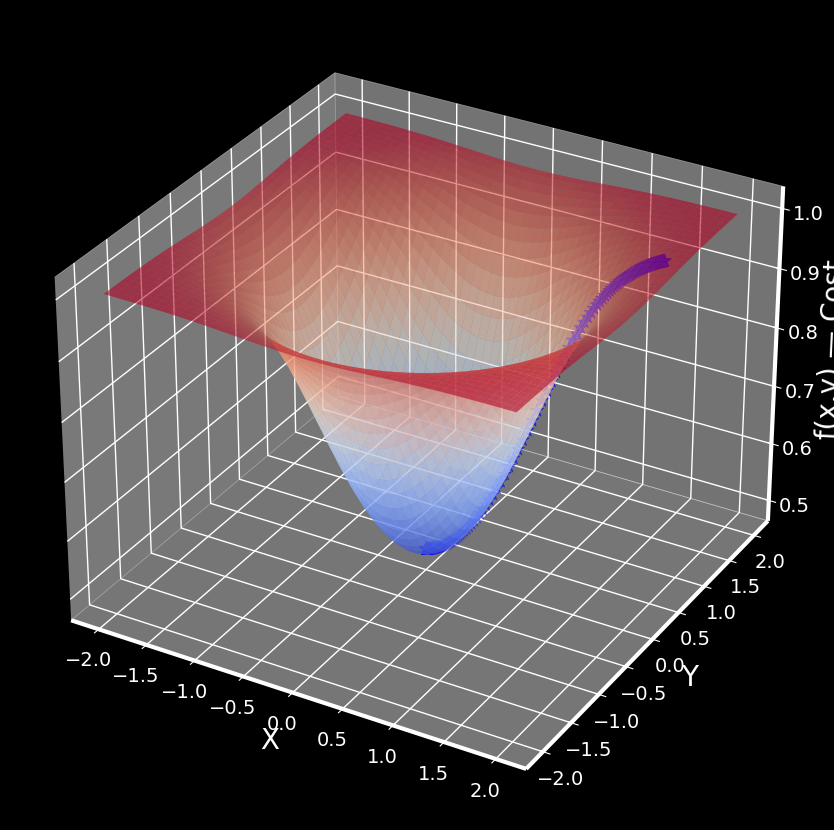

In [60]:
fig = plt.figure(figsize=(16, 10))
ax  = fig.add_subplot(111, projection='3d')    # “get current axes” in 3D

# Plotting the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.6)    #cm= colormap

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y) — Cost', fontsize=20)
ax.scatter(arr_values[:, 0], arr_values[:, 1],
           f(arr_values[:, 0], arr_values[:, 1]), marker= '*', s=100, c='blue')

plt.show()

- Performance note: repeatedly calling np.append/np.concatenate in a tight loop reallocates memory each iteration. For large numbers of iterations, prefer:

Collect params rows in a Python list (rows.append(params.copy())) and do one np.vstack(rows) after the loop, or

Pre-allocate an array of shape (max_iter+1, 2) and fill rows by index (fastest).

**KEY TERMS / Questions**

- reshape(rows, cols) — change the array’s dimensional shape (e.g. (2,) → (1,2)).

- np.append(arr=..., values=..., axis=...) — append values along given axis; returns a new array.

- Axis meaning: axis=0 = add rows; axis=1 = add columns.

- Indexing 2-D arrays: arr[row, col]; arr[row] returns that whole row.

- Slicing: arr[:, j] selects column j; arr[i, :] selects row i.

- Homogeneous dtype: NumPy arrays hold one dtype; mixing strings and numbers will coerce to strings.

- Performance question: If you append inside a loop many times, is np.append the best choice? (Hint: collecting into a list then np.vstack/np.array once is usually faster.)

- Plot question: After collecting values_array, how do you overlay the GD path on the existing 3-D surface? (Hint: use your ax.plot or ax.plot3D with x, y, and f(x,y) evaluated at the stored points.)

**Summary**

You prepared the gradient-descent trajectory for 3-D plotting by storing parameter vectors as rows in a 2-D NumPy array (values_array). Key array techniques covered: checking .shape, using reshape(1,2) to force a row vector, indexing (arr[row, col]), slicing (arr[:, 1] to get a column), and appending rows with np.append(..., axis=0). Important cautions: NumPy arrays are homogeneous in dtype, np.append returns a new array (not in-place) and can be slow when used repeatedly in loops — prefer building a Python list of rows and converting once if performance matters. With the collected values_array you can now extract x, y, compute z = f(x,y), and plot the GD path on the 3-D surface to visualize how the algorithm descends.

Add values_array = np.append(values_array, params.reshape(1,2), axis=0) inside your GD loop to record each new parameter vector as a row. After the loop, extract x and y via values_array[:,0] and values_array[:,1], compute z = f(x,y), and call ax.scatter(x, y, z, s=100, c='red') to plot the descent path over the 3-D surface. You can use np.concatenate as an alternative to np.append. For many iterations prefer collecting rows in a Python list (or pre-allocating) for performance, then convert once to a NumPy array for plotting.